## Lesson4 - Placeholders

In [1]:
import tensorflow as tf

x = tf.placeholder('float', None)
y = x * 2

with tf.Session() as sess:
    result = sess.run(y, feed_dict={x: [[1, 2, 3],
                                        [4, 5, 6]]})
    print(result)

[[  2.   4.   6.]
 [  8.  10.  12.]]


In [1]:
import tensorflow as tf

x = tf.placeholder('float', [None, 3])
y = x * 2

with tf.Session() as sess:
    result = sess.run(y, feed_dict={x: [[1, 2, 3],
                                        [4, 5, 6]]})
    print(result)

[[  2.   4.   6.]
 [  8.  10.  12.]]


(3000, 3685, 3)


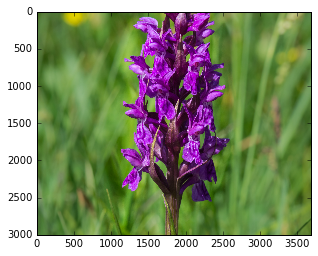

In [2]:
%matplotlib inline

import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = 'MarshOrchid.jpg'
raw_image_data = mpimg.imread(filename)

image = tf.placeholder('uint8', [None, None, 3])
slice = tf.slice(image, [1000, 0, 0], [3000, -1, -1])

with tf.Session() as sess:
    result = sess.run(slice , feed_dict={image: raw_image_data})
    print(result.shape)
    
plt.imshow(result)
plt.show()

## Exercise

1) Take a look at the other functions for arrays in TensorFlow at the official documentation.

2) Break the image apart into four “corners”, then stitch it back together again.

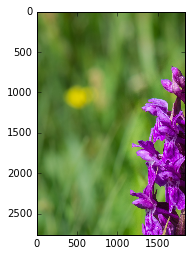

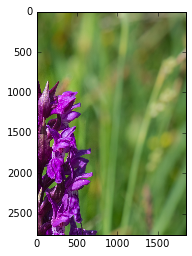

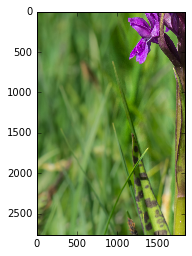

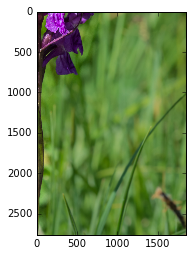

In [7]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = 'MarshOrchid.jpg'
raw_image_data = mpimg.imread(filename)
height, width, depth = raw_image_data.shape

image = tf.placeholder('uint8', [None, None, 3])
lt = tf.slice(image, [0, 0, 0], [height//2, width//2, -1])
rt = tf.slice(image, [0, width//2, 0], [height//2, -1, -1])
lb = tf.slice(image, [height//2, 0, 0], [-1, width//2, -1])
rb = tf.slice(image, [height//2, width//2, 0], [-1, -1, -1])

slices = [lt, rt, lb, rb]
rsts = []

with tf.Session() as sess:
    for slice in slices:
        rsts.append(sess.run(slice , feed_dict={image: raw_image_data}))
    
for rst in rsts:
    plt.imshow(rst)
    plt.show()

3) Convert the image into grayscale. One way to do this would be to take just a single colour channel and show that. Another way would be to take the average of the three channels as the gray colour.

uint8


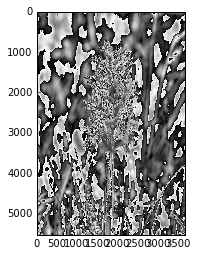

In [16]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = 'MarshOrchid.jpg'
raw_image_data = mpimg.imread(filename)

image = tf.placeholder('uint8', [None, None, 3])
cvt_color_gray = tf.reduce_mean(image, axis=2)

with tf.Session() as sess:
    gray_img = sess.run(cvt_color_gray, feed_dict={image: raw_image_data})
    print(gray_img.dtype)
    
plt.imshow(gray_img, cmap='gray')
plt.show()